In [1]:
from Functions_lab4 import*

In [2]:
#parameters
base_dense=8
batch_size=8
LR=0.0001
img_w,img_h,img_ch=256,256,1


#metrics list
metric_list=[dice_coef,"Precision",'Recall']

#loss functions list
loss_func_list=[dice_coef_loss,'binary_crossentropy']

In [3]:
#load the X_ray images

#first create the set with the dir info
x_train,y_train,x_test,y_test = create_data('Lab3','CT',0.8)

#then load the images thanks to the info
x_train = load_data(x_train,img_w,img_h,img_ch)
y_train = load_data(y_train,img_w,img_h,img_ch,mask=True)
x_test = load_data(x_test,img_w,img_h,img_ch)
y_test = load_data(y_test,img_w,img_h,img_ch,mask=True)

#the intensity and resize rescale are already done in load_data function

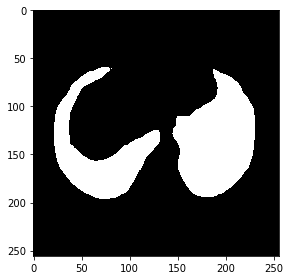

In [10]:
from skimage.io import imshow
imshow(np.squeeze(y_test[0]))

# Task 2a

In [17]:
my_model2=get_unet_batch(base_dense,img_w,img_h,img_ch,dropout=True,dr=0.2)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 256, 256, 8)  80          input_layer[0][0]                
__________________________________________________________________________________________________
batch_normalization_v2_18 (Batc (None, 256, 256, 8)  32          conv2d_18[0][0]                  
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 256, 256, 8)  0           batch_normalization_v2_18[0][0]  
____________________________________________________________________________________________

In [12]:
#with dice_coef_loss
model_hist=compile_fit(my_model2,loss_function=loss_func_list[1], optimizer=Adam(LR),metrics=[dice_coef],x_train=x_train,y_train=y_train,
                       x_test=x_test,y_test=y_test,batch_size=batch_size,n_epochs=50)

Train on 6735 samples, validate on 1684 samples
Epoch 1/50
6735/6735 [==============================] - 35s 5ms/sample - loss: 0.1622 - dice_coef: 0.7628 - val_loss: 0.0646 - val_dice_coef: 0.9190
Epoch 2/50
6735/6735 [==============================] - 33s 5ms/sample - loss: 0.0329 - dice_coef: 0.9609 - val_loss: 0.0285 - val_dice_coef: 0.9670
Epoch 3/50
6735/6735 [==============================] - 33s 5ms/sample - loss: 0.0269 - dice_coef: 0.9722 - val_loss: 0.0316 - val_dice_coef: 0.9631
Epoch 4/50
6735/6735 [==============================] - 34s 5ms/sample - loss: 0.0239 - dice_coef: 0.9759 - val_loss: 0.0483 - val_dice_coef: 0.9279
Epoch 5/50
6735/6735 [==============================] - 35s 5ms/sample - loss: 0.0210 - dice_coef: 0.9780 - val_loss: 0.0190 - val_dice_coef: 0.9758
Epoch 6/50
6735/6735 [==============================] - 35s 5ms/sample - loss: 0.0186 - dice_coef: 0.9801 - val_loss: 0.0193 - val_dice_coef: 0.9760
Epoch 7/50
6735/6735 [==============================] - 35

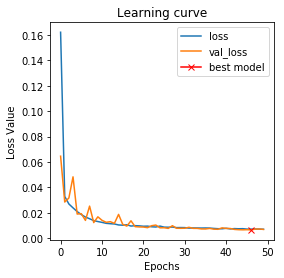

In [13]:
loss_curves_plot(model_hist)

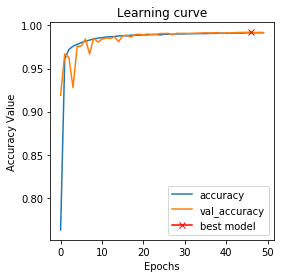

In [14]:
accuracy_curves_plot(model_hist,'dice_coef')

# Task 2b

In [4]:
def precision(y_true,y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + K.epsilon()) / (K.sum(y_pred_f) + K.epsilon())

def recall(y_true,y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + K.epsilon()) / (K.sum(y_true_f) + K.epsilon())

In [5]:
#data augmentation
dictionary_augmentation = dict(
                     rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,       
                     horizontal_flip=True)



In [6]:
train_generator, STEP_SIZE_TRAIN=augmentation(x_train,y_train,dictionary_augmentation,batch_size)

In [7]:
my_model2b=get_unet_batch(base_dense,img_w,img_h,img_ch,dropout=True,dr=0.2)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 8)  80          input_layer[0][0]                
__________________________________________________________________________________________________
batch_normalization_v2 (BatchNo (None, 256, 256, 8)  32          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 8)  0           batch_normalization_v2[0][0]     
______________________________________________________________________________________________

In [9]:
model_hist=compile_fit_generator(my_model2b,train_generator,x_test,y_test,loss_func_list[0], optimizer=Adam(LR),metrics=dice_coef,batch_size=batch_size,n_epochs=50,STEP_SIZE_TRAIN=STEP_SIZE_TRAIN)

Epoch 1/50
1683/1683 [==============================] - 88s 52ms/step - loss: 0.1096 - dice_coef: 0.8904 - val_loss: 0.0410 - val_dice_coef: 0.9590
Epoch 2/50
1683/1683 [==============================] - 81s 48ms/step - loss: 0.0214 - dice_coef: 0.9786 - val_loss: 0.0184 - val_dice_coef: 0.9816
Epoch 3/50
1683/1683 [==============================] - 80s 48ms/step - loss: 0.0188 - dice_coef: 0.9812 - val_loss: 0.0183 - val_dice_coef: 0.9817
Epoch 4/50
1683/1683 [==============================] - 80s 48ms/step - loss: 0.0177 - dice_coef: 0.9823 - val_loss: 0.0146 - val_dice_coef: 0.9854
Epoch 5/50
1683/1683 [==============================] - 80s 48ms/step - loss: 0.0173 - dice_coef: 0.9827 - val_loss: 0.0144 - val_dice_coef: 0.9856
Epoch 6/50
1683/1683 [==============================] - 80s 48ms/step - loss: 0.0161 - dice_coef: 0.9839 - val_loss: 0.0123 - val_dice_coef: 0.9877
Epoch 9/50
1683/1683 [==============================] - 80s 48ms/step - loss: 0.0159 - dice_coef: 0.9841 - val_l

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1683/1683 [==============================] - 80s 48ms/step - loss: 0.0150 - dice_coef: 0.9850 - val_loss: 0.0106 - val_dice_coef: 0.9894
Epoch 16/50
1683/1683 [==============================] - 80s 48ms/step - loss: 0.0152 - dice_coef: 0.9847 - val_loss: 0.0104 - val_dice_coef: 0.9896
Epoch 17/50
1683/1683 [==============================] - 80s 48ms/step - loss: 0.0150 - dice_coef: 0.9850 - val_loss: 0.0103 - val_dice_coef: 0.9897
Epoch 18/50
1683/1683 [==============================] - 81s 48ms/step - loss: 0.0149 - dice_coef: 0.9851 - val_loss: 0.0130 - val_dice_coef: 0.9870
Epoch 19/50
  71/1683 [>.............................] - ETA: 1:07 - loss: 0.0138 - dice_coef: 0.9862

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1683/1683 [==============================] - 81s 48ms/step - loss: 0.0150 - dice_coef: 0.9850 - val_loss: 0.0109 - val_dice_coef: 0.9891
Epoch 20/50
1683/1683 [==============================] - 80s 47ms/step - loss: 0.0151 - dice_coef: 0.9849 - val_loss: 0.0117 - val_dice_coef: 0.9883
Epoch 21/50
1683/1683 [==============================] - 81s 48ms/step - loss: 0.0148 - dice_coef: 0.9852 - val_loss: 0.0210 - val_dice_coef: 0.9790
Epoch 22/50
1683/1683 [==============================] - 81s 48ms/step - loss: 0.0147 - dice_coef: 0.9853 - val_loss: 0.0115 - val_dice_coef: 0.9885
Epoch 23/50
1683/1683 [==============================] - 80s 47ms/step - loss: 0.0148 - dice_coef: 0.9852 - val_loss: 0.0106 - val_dice_coef: 0.9894
Epoch 24/50
1683/1683 [==============================] - 80s 48ms/step - loss: 0.0148 - dice_coef: 0.9852 - val_loss: 0.0094 - val_dice_coef: 0.9906
Epoch 25/50
1683/1683 [==============================] - 80s 48ms/step - loss: 0.0147 - dice_coef: 0.9853 - val_loss: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1683/1683 [==============================] - 80s 48ms/step - loss: 0.0143 - dice_coef: 0.9857 - val_loss: 0.0100 - val_dice_coef: 0.9900
Epoch 41/50
1683/1683 [==============================] - 80s 48ms/step - loss: 0.0143 - dice_coef: 0.9857 - val_loss: 0.0092 - val_dice_coef: 0.9908
Epoch 42/50
1683/1683 [==============================] - 80s 48ms/step - loss: 0.0143 - dice_coef: 0.9857 - val_loss: 0.0088 - val_dice_coef: 0.9912
Epoch 43/50
 889/1683 [==============>...............] - ETA: 36s - loss: 0.0143 - dice_coef: 0.9857

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1683/1683 [==============================] - 80s 48ms/step - loss: 0.0142 - dice_coef: 0.9858 - val_loss: 0.0088 - val_dice_coef: 0.9912
Epoch 50/50
1683/1683 [==============================] - 80s 48ms/step - loss: 0.0143 - dice_coef: 0.9857 - val_loss: 0.0092 - val_dice_coef: 0.9908


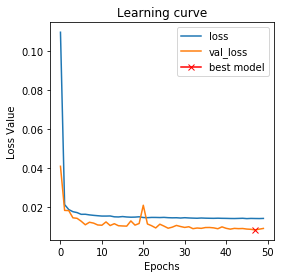

In [10]:
loss_curves_plot(model_hist)

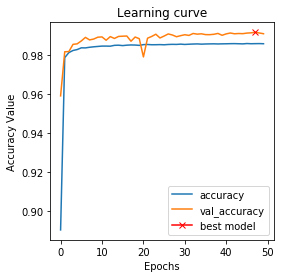

In [11]:
accuracy_curves_plot(model_hist,'dice_coef')